In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set environment variables
import os

os.environ["SCAL_TYPE"] = "real"
os.environ["PRECISION"] = "double"
os.environ["MY_NUMBA_TARGET"] = "numba"

# Add cle_fun to PYTHON_PATH
import sys
sys.path.append("../../clonscal")

In [2]:
from simulation.cl_simulation import ComplexLangevinSimulation
from simulation.config import Config

config = Config(dims=[1], dt = 0.1, mass_real = -1, interaction=0.4)
sim = ComplexLangevinSimulation(config)

Using double precision
Using R^1
Using Numba


In [5]:
from src.utils import KernelBridge
from src.utils import noise_kernel, evolve_kernel, mexican_hat_kernel_real

kernel_br = KernelBridge(sim, [noise_kernel, evolve_kernel, mexican_hat_kernel_real])
n_steps = int(1e5)
phi = np.empty(n_steps)

args = kernel_br.get_current_params()
for k in range(n_steps):
    sim.update_noise(noise_kernel, *args[noise_kernel].values())
    sim.update_drift(mexican_hat_kernel_real, *args[mexican_hat_kernel_real].values())
    args = kernel_br.get_current_params()
    sim.update_field(evolve_kernel, *args[evolve_kernel].values())
    sim.swap()
    phi[k] = sim.phi1[0]

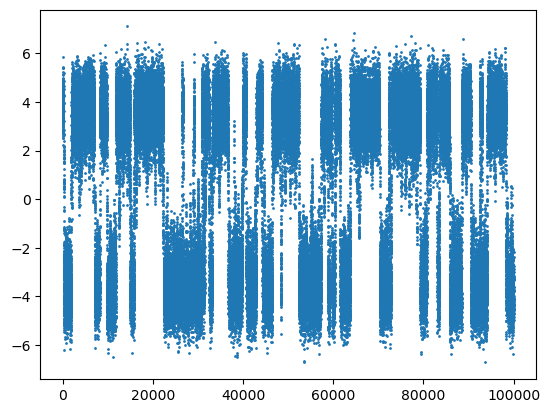

In [6]:
plt.scatter(np.arange(len(phi)), phi, s=1)